<a href="https://colab.research.google.com/github/budhiraja03/Practicals/blob/main/Assignment2_TimeSeries_CyberattacksDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Workflow of Cyberattacks Time Series Dataset

- 💻 `import pandas as pd`
- 💻 `df = pd.read_csv('/content/cybersecurity_attacks.csv')`
- 💻 `df.info()`
- 💻 `df.shape`
- 💻 `df.describe()`

### 📘 Data Cleaning
- 💻 `df.isnull().sum()  # Missing Values`

### 📘 Let's Handle the Missing Values First
- 💻 `# If the Alert Triggered is present, then it's a yes, else it's a no`
- 💻 `# If the Malware Indicators is present, then it's a No, else it's a No Detection.`
- 💻 `# If Proxy Information is missing, it is assumed that there is no proxy`
- 💻 `# If Firewall Logs is missing, it is assumed that there is no data`
- 💻 `# If IDS/IPS Alerts is "No Data", then it means that the alert was not generated by IDS/IPS.`
- 💻 `df.isnull().sum()`
- 💻 `df.shape`

### 📘 Feature Engineering
- 💻 `df['Browser'] = df['Device Information'].str.split('/').str[0]`
- 💻 `import re`
- 💻 `df['Browser'].value_counts()`
- 💻 `df['Device/OS'].value_counts()`
- 💻 `df = df.drop('Device Information', axis=1)`

### 📘 DateTime Feature Extraction
- 💻 `def extract_time_features(df):`
- 💻 `df = extract_time_features(df)`
- 💻 `df['Timestamp'] = pd.to_datetime(df['Timestamp'])`
- 💻 `df.set_index('Timestamp', inplace=True)`

### 📘 Data visualization (Exploring the Timestamp Column)
- 💻 Checking the Day Column ploting

   `plt = px.histogram(df, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')`
- 💻 Checking the Month Column ploting

   `plt = px.histogram(df, x = 'Month', color = 'Malware Indicators', title = 'Number of Malware Attacks by Month')`
- 💻 Checking the Year Column ploting

   `plt = px.histogram(df, x = 'Year', color = 'Malware Indicators', title = 'Number of Malware Attacks by Year')`

### 📘 Hourly Packet Length Analysis
- 💻 `hourly_packet_length = df.groupby('Hour')['Packet Length'].sum().reset_index()`
- 💻 `sns.barplot(data=hourly_packet_length, x='Hour', y='Packet Length', color='blue')`

### 📘 Hour Interval-based Packet Length Analysis
Total packet length transmitted across defined 3-hour intervals throughout the day
- 💻 `hour_bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]`
- 💻 `hour_labels = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]`
- 💻 `df['Hour Interval'] = pd.cut(df['Hour'], bins=hour_bins, labels=hour_labels, right=False)`
- 💻 `interval_packet_length = df.groupby('Hour Interval')['Packet Length'].sum().reset_index()`

### 📘 15-Minute Interval Packet Length Analysis
- 💻 `df['Minute'] = df.index.minute`
- 💻 `minute_bins = [0, 15, 30, 45, 60]`
- 💻 `minute_labels = ["00-14", "15-29", "30-44", "45-59"]`
- 💻 `df['Minute Interval'] = pd.cut(df['Minute'], bins=minute_bins, labels=minute_labels, right=False)`
- 💻 `minute_interval_packet_length = df.groupby('Minute Interval')['Packet Length'].sum().reset_index()`

### 📘 Time Series Preparation
- 💻 `series = df['Malware Indicators'].resample('D').count()`
- 💻 `from statsmodels.tsa.seasonal import seasonal_decompose`
- 💻 `seasonal_decompose(series, model='additive').plot()`

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('/content/cybersecurity_attacks.csv')
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [87]:
df.shape

(40000, 25)

In [88]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


##**Data Cleaning**

In [89]:
df.isnull().sum()  # Missing Values

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


####Let's Handle the Missing Values First

In [90]:
# If the Alert Triggered is present, then it's a yes, else it's a no
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')

In [91]:
# If the Malware Indicators is present, then it's a No, else it's a No Detection.
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [92]:
# If Proxy Information is missing, it is assumed that there is no proxy
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [93]:
# If Firewall Logs is missing, it is assumed that there is no data
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [94]:
# If IDS/IPS Alerts is "No Data", then it means that the alert was not generated by IDS/IPS.
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [95]:
df.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


In [96]:
df.shape

(40000, 25)

In [97]:
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [98]:
df['Browser']

,Browser
0,Mozilla
1,Mozilla
2,Mozilla
3,Mozilla
4,Mozilla
...,...
39995,Mozilla
39996,Mozilla
39997,Mozilla
39998,Mozilla


In [99]:
import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]
def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [100]:
df['Browser'].value_counts()

,count
Browser,
Mozilla,31951
Opera,8049


In [101]:
df['Device/OS'].value_counts()

,count
Device/OS,
Windows,17953
Linux,8840
Macintosh,5813
iPod,2656
Android,1620
iPhone,1567
iPad,1551


In [102]:
df = df.drop('Device Information', axis = 1)

In [103]:
def extract_time_features(df, Timestamp):
    # Convert timestamp column to datetime if it's not already
    df[Timestamp] = pd.to_datetime(df[Timestamp])
    # Extract time features
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

In [105]:
new_df = extract_time_features(df, 'Timestamp')
new_df.set_index('Timestamp', inplace=True)

# Check if new columns are created
print(new_df.head())

                    Source IP Address Destination IP Address  Source Port  \
Timestamp                                                                   
2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

                     Destination Port Protocol  Packet Length Packet Type  \
Timestamp                                                                   
2023-05-30 06:33:58             17616     ICMP            503        Data   
2020-08-26 07:08:30             48166     ICMP           1174        Data   
2022-11-13 08:23:25             53600      UDP            306     Control   
2023-07-02 10:38:46             32534      UDP            385        Data  

In [106]:
df.head().T

Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...
Malware Indicators,IoC Detected,IoC Detected,IoC Detected,No Detection,No Detection


In [107]:
df.columns

Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Network Segment',
       'Geo-location Data', 'Proxy Information', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek'],
      dtype='object')

##**Data Visualization**

In [24]:
import plotly.express as px

#### **Explore the Timestamp Column.**

In [108]:
# Checking the Day Column ploting with plotly
plt = px.histogram(df, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')
plt.show()

* Most of the attacks (720) happened on
the 9th of the month.

In [26]:
# Checking the Month Column ploting with plotly
plt = px.histogram(df, x = 'Month', color = 'Malware Indicators', title = 'Number of Malware Attacks by Month')
plt.show()

* Most of the attacks (1861) happened in the month of 8th Month which is August.

In [27]:
# Checking the Year Column ploting with plotly
plt = px.histogram(df, x = 'Year', color = 'Malware Indicators', title = 'Number of Malware Attacks by Year')
plt.show()

* Most Attacks which happend are Recorded in mid of 2021 upto the mid of 2022.

In [28]:
# Checking the Protocol distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Protocol', color = 'Malware Indicators', title = 'Number of Malware Attacks by Protocol')
plt.show()

In [29]:
# Ploting the Traffic Type distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Traffic Type', color = 'Malware Indicators', title = 'Number of Malware Attacks by Traffic Type')
plt.show()

In [30]:
# Attack Type Distribution
plt = px.pie(df, names = 'Attack Type', title = 'Attack Type Distribution')
plt.show()

In [31]:
# Checking the attack types distribution with Bar Chart Using Plotly
plt = px.histogram(df, x='Attack Type', color='Traffic Type', title='Number of Malware Attacks by Attack Type')
plt.show()

In [35]:
# checking the browser against the attack type
plt = px.histogram(df, x= 'Browser', color='Attack Type', title= 'Number of Attacks by Browser')
plt.show()

In [50]:
# Action Taken Distribution
plt = px.histogram(df, x='Action Taken', color='Malware Indicators', title='Log Source')
plt.show()

In [40]:
# Checking the Packet Length of Malware, Intrusion and DDoS and comparing
plt = px.histogram(df, x='Packet Length', color='Attack Type', title='Packet Length')
plt.show()

    Hour  Packet Length
0      0        1334871
1      1        1270313
2      2        1303698
3      3        1283924
4      4        1327587
5      5        1280005
6      6        1269906
7      7        1257878
8      8        1298776
9      9        1272894
10    10        1347038
11    11        1304962
12    12        1243838
13    13        1354065
14    14        1315763
15    15        1354826
16    16        1306837
17    17        1309722
18    18        1294521
19    19        1330644
20    20        1319582
21    21        1326576
22    22        1238549
23    23        1311334


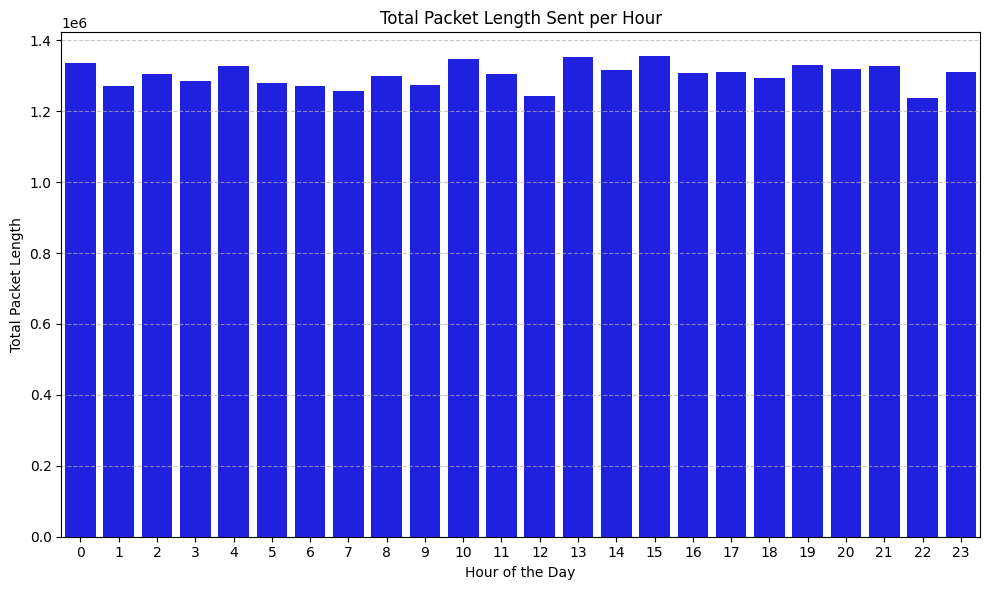

In [113]:
import matplotlib.pyplot as plt
hourly_packet_length = df.groupby('Hour')['Packet Length'].sum().reset_index()

print(hourly_packet_length)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_packet_length, x='Hour', y='Packet Length', color='blue')
plt.title('Total Packet Length Sent per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Packet Length')
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-43-2ad8611b4d6f>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  Hour Interval  Packet Length
0           0-3        3908882
1           4-6        3891516
2           7-9        3826560
3         10-12        3924894
4         13-15        3913666
5         16-18        3971385
6         19-21        3944747
7         22-24        3876459


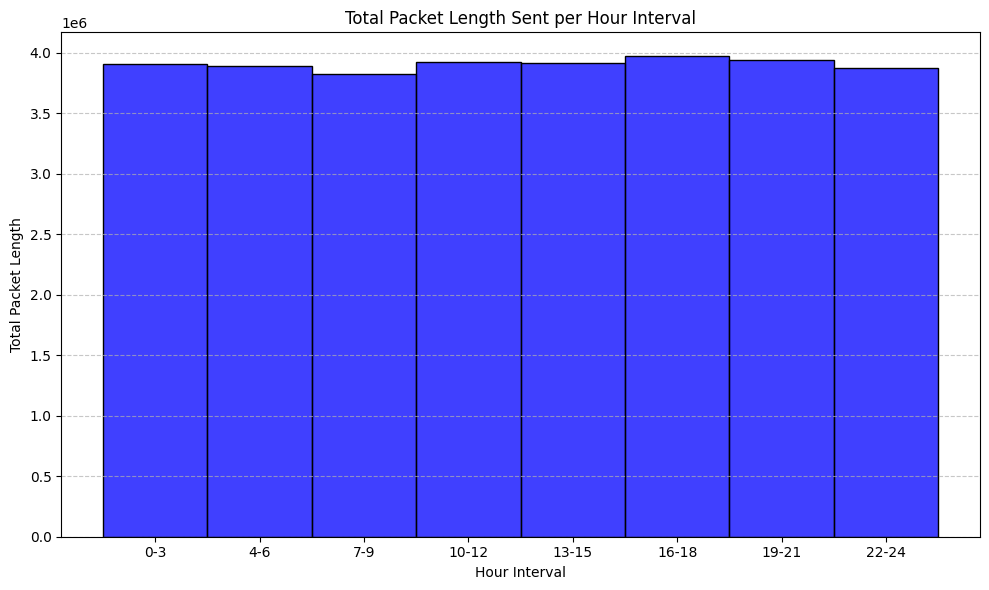

In [43]:
import pandas as pd
import seaborn as sns

# Grouping packet lengths by hourly intervals
hour_bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
hour_labels = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]

df['Hour Interval'] = pd.cut(df['Hour'], bins=hour_bins, labels=hour_labels, right=False)

# Group by hour intervals and sum packet lengths
interval_packet_length = df.groupby('Hour Interval')['Packet Length'].sum().reset_index()
print(interval_packet_length)

plt.figure(figsize=(10, 6))
sns.histplot(data=interval_packet_length, x='Hour Interval', weights='Packet Length', bins=len(hour_labels), kde=False, color='blue')

plt.title('Total Packet Length Sent per Hour Interval')
plt.xlabel('Hour Interval')
plt.ylabel('Total Packet Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-116-37a224fade99>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



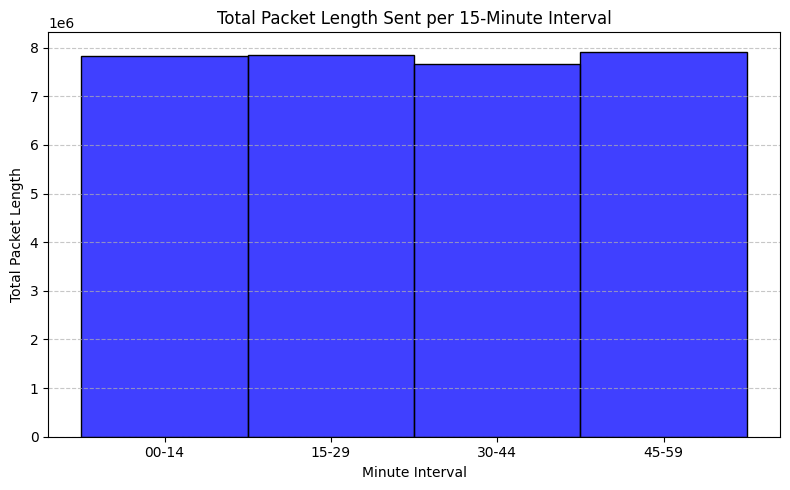

In [116]:
minute_bins = [0, 15, 30, 45, 60]
minute_labels = ["00-14", "15-29", "30-44", "45-59"]
df['Minute Interval'] = pd.cut(df['Minute'], bins=minute_bins, labels=minute_labels, right=False)

# Group by Minute Interval and sum the Packet Length
minute_interval_packet_length = df.groupby('Minute Interval')['Packet Length'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data=minute_interval_packet_length, x='Minute Interval', weights='Packet Length', bins=len(minute_labels), kde=False, color='blue')
plt.title('Total Packet Length Sent per 15-Minute Interval')
plt.xlabel('Minute Interval')
plt.ylabel('Total Packet Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  Month Interval  Packet Length
0            1-4        7935328
1            5-8       11189681
2           9-12       10067320


<ipython-input-48-d6570088457a>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



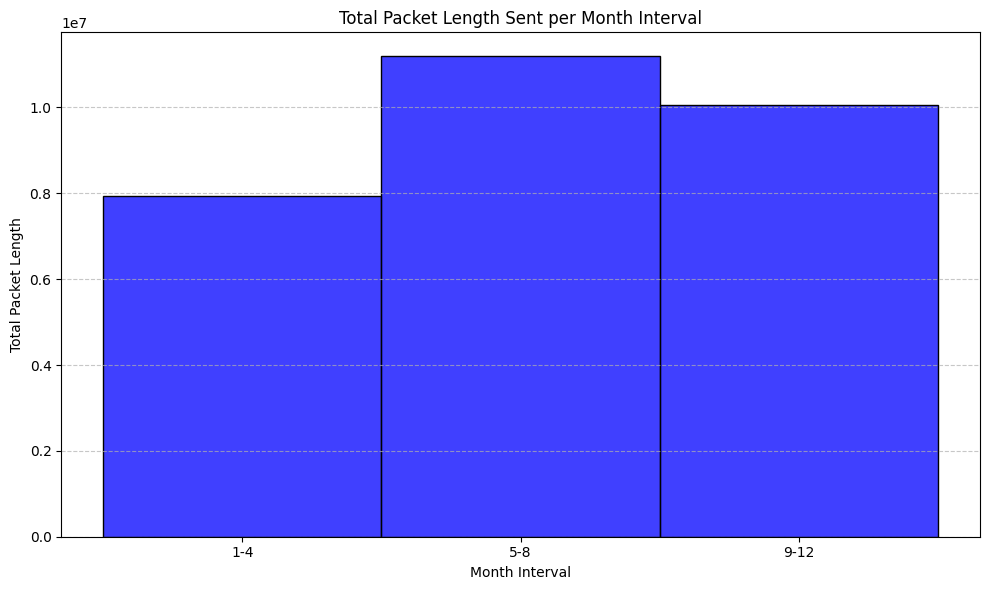

In [48]:
# Grouping packet lengths by monthly intervals
month_bins = [1, 4, 8, 12]  # Define monthly intervals
month_labels = ["1-4", "5-8", "9-12"]

# Assign bins to hours
df['Month Interval'] = pd.cut(df['Month'], bins=month_bins, labels=month_labels, right=False)

# Group by hour intervals and sum packet lengths
interval_packet_length = df.groupby('Month Interval')['Packet Length'].sum().reset_index()
print(interval_packet_length)
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=interval_packet_length, x='Month Interval', weights='Packet Length', bins=len(month_labels), kde=False, color='blue')

plt.title('Total Packet Length Sent per Month Interval')
plt.xlabel('Month Interval')
plt.ylabel('Total Packet Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [109]:
series = df['Malware Indicators'].resample('D').count()

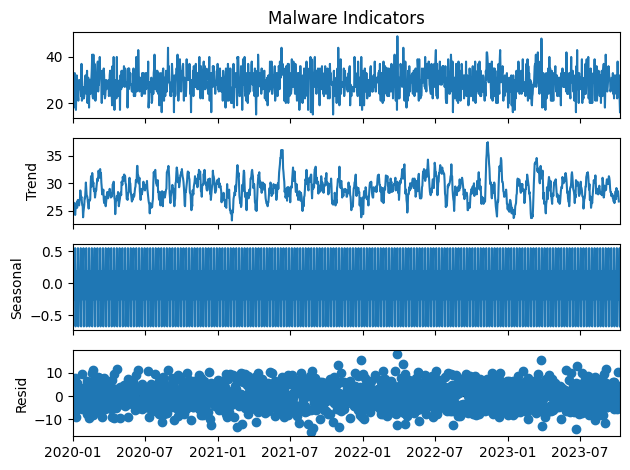

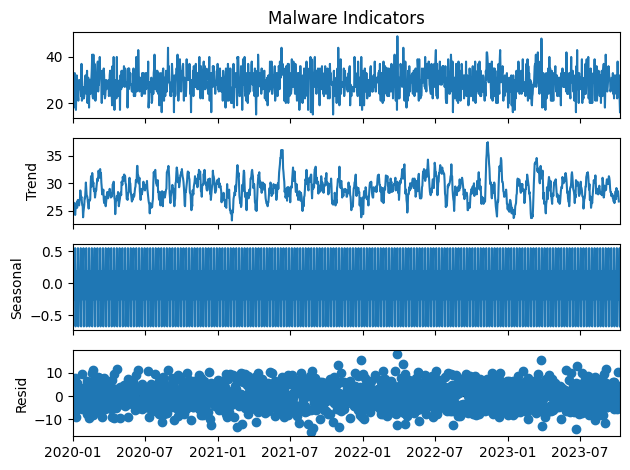

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(series, model='additive').plot()